In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\ckd-dataset-v2.csv")

# View basic info
print(df.head())
print(df.info())
print(df.describe())

# Check missing values and unique classes
print(df.isnull().sum())
print(df['class'].unique())
print(df['class'].isnull().sum())
print(df[df['class'].isnull()])

# Replace 'discrete' with NaN (since it's not valid)
df['class'] = df['class'].replace('discrete', np.nan)

# Drop rows with missing or invalid 'class' values
df = df.dropna(subset=['class'])

# Map the text values to numeric labels for ML
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

# Fill missing values for each column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# Check total missing values after cleaning
print(df.isnull().sum().sum())

# Verify target column
print(df['class'].unique())
print(df['class'].isnull().sum())

# Split features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']



  bp (Diastolic)  bp limit             sg        al     class       rbc  \
0       discrete  discrete       discrete  discrete  discrete  discrete   
1            NaN       NaN            NaN       NaN       NaN       NaN   
2              0         0  1.019 - 1.021     1 - 1       ckd         0   
3              0         0  1.009 - 1.011       < 0       ckd         0   
4              0         0  1.009 - 1.011       ≥ 4       ckd         1   

         su        pc       pcc        ba  ...       htn        dm       cad  \
0  discrete  discrete  discrete  discrete  ...  discrete  discrete  discrete   
1       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2       < 0         0         0         0  ...         0         0         0   
3       < 0         0         0         0  ...         0         0         0   
4       < 0         1         0         1  ...         0         0         0   

      appet        pe       ane                grf     stage  affect

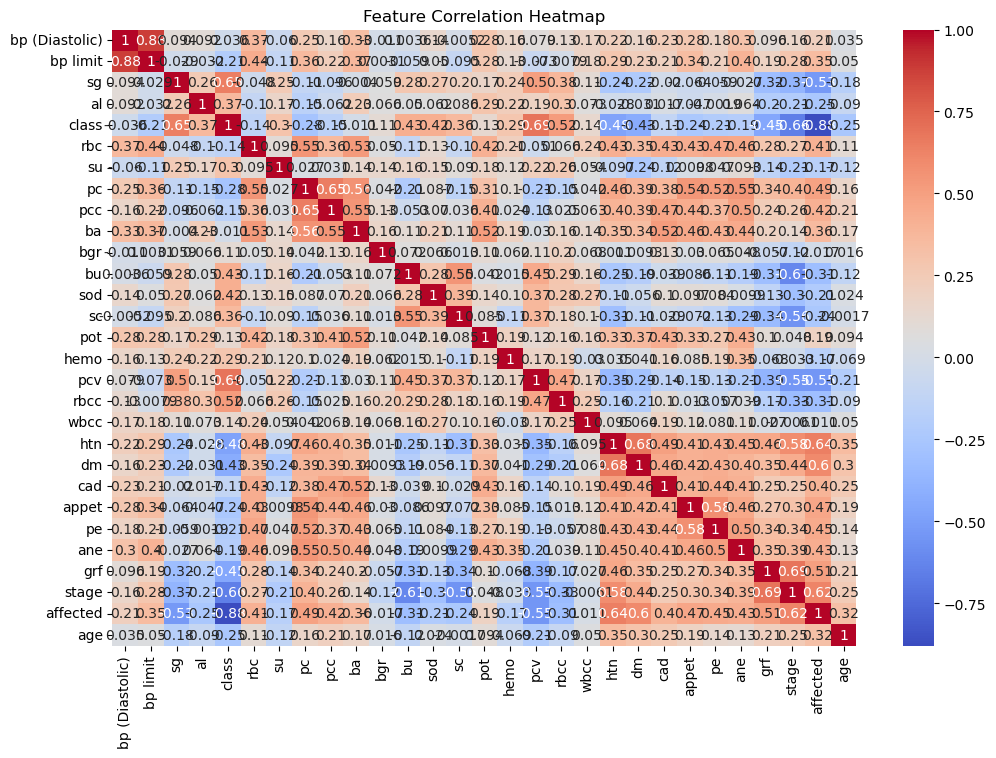

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')


In [19]:
# Convert categorical (object) columns into numeric
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv(r"C:\Users\User\Downloads\ckd-dataset-v2.csv")


df_encoded = df.copy()

# Encode all object (string) columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Now draw the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
print(df.select_dtypes(include='object').columns)


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

# Encode categorical columns in X
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

# Use encoded X for training
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)




C:\Users\User\AppData\Local\Temp\ipykernel_8968\776962224.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


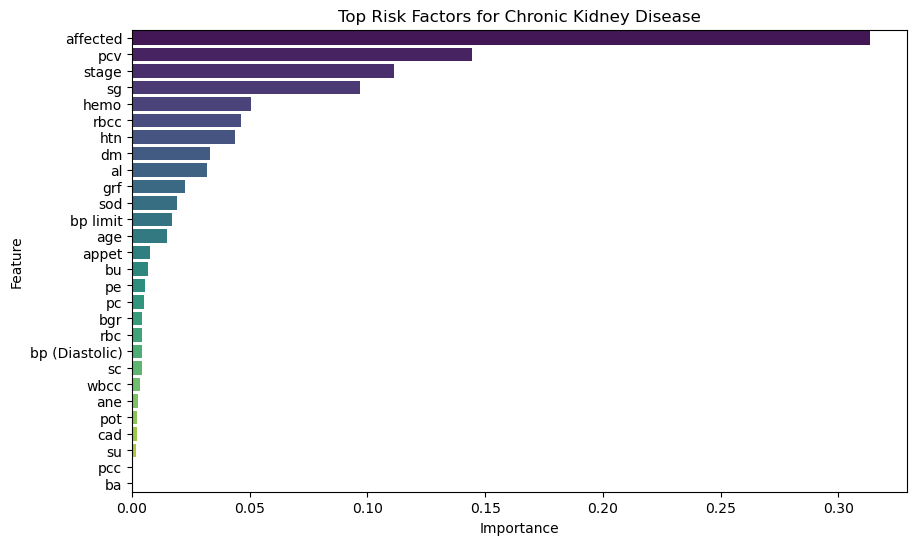

Top 10 Risk Factors:
     Feature  Importance
26  affected    0.313504
15       pcv    0.144376
25     stage    0.111399
2         sg    0.096841
14      hemo    0.050745
16      rbcc    0.046097
18       htn    0.043629
19        dm    0.033229
3         al    0.031935
24       grf    0.022602


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y)
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split data (not for accuracy, but for analysis)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top Risk Factors for Chronic Kidney Disease')
plt.show()

# Display top 10 features
print("Top 10 Risk Factors:")
print(importance_df.head(10))


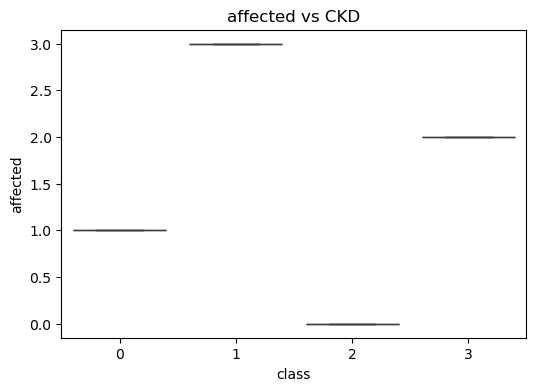

[1 3 0 2]


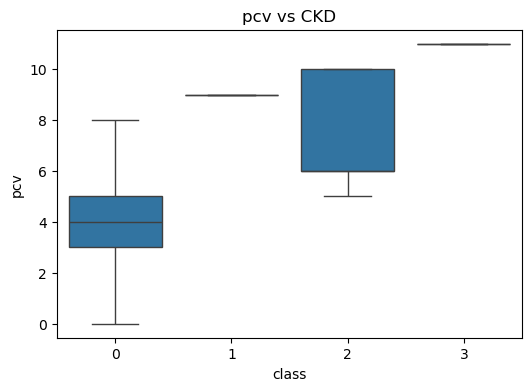

[1 3 0 2]


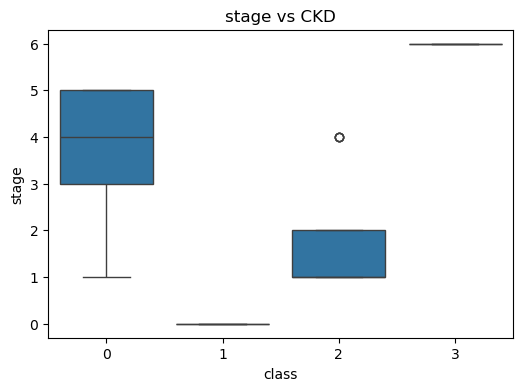

[1 3 0 2]


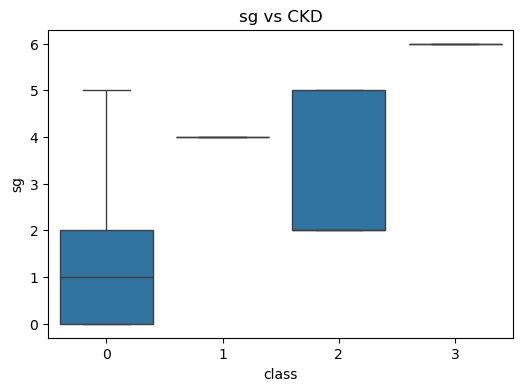

[1 3 0 2]


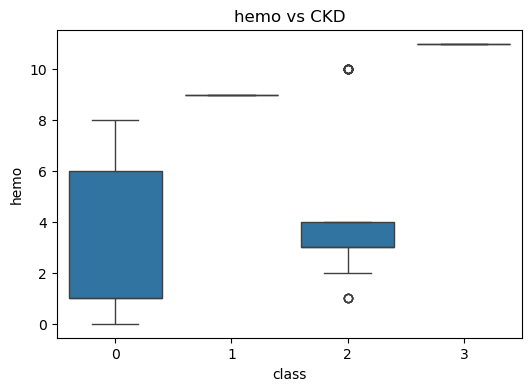

[1 3 0 2]
[3 2 1 0]


In [31]:
top_features = importance_df['Feature'].head(5).values

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='class', y=feature, data=df_encoded)
    plt.title(f'{feature} vs CKD')
    plt.show()
    print(df_encoded['class'].unique())
print(df_encoded['affected'].unique())

